<a href="https://colab.research.google.com/github/Eddythemachine/linear_regression_learning/blob/main/linear_regression_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBARIES

In [72]:
# prompt: import panda, numpy, matlotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# from helper import (plot_exponential_data,
#                     plot_square_normal_data)

# from helper import plot_exponential_data, plot_square_normal_data

# IMPORTING DATASET

In [73]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [74]:
df.shape

(20640, 10)

For convenience

In [75]:
#Done for inconvenience

df = df.rename(columns={"median_house_value": "target"})


# Checking for missing values

In [76]:
missing_values_sum = df.isnull().sum()
print(f"The total number of missing values in the DataFrame is: {missing_values_sum}")


The total number of missing values in the DataFrame is: longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
target                  0
ocean_proximity         0
dtype: int64


# Dropping Missing Values

In [77]:
# prompt: drop null values from df

df.dropna(inplace=True)


In [78]:
df.shape

(20433, 10)

# Determing Normality

# Why Normalize Target Values in Machine Learning

Normalizing the **target variable** (also called the dependent variable) is an important preprocessing step in certain machine learning tasks, particularly regression. This process involves transforming the target values to a **common scale**—typically using standardization (z-score), min-max scaling, or logarithmic transformations.

---

## 🔍 Why Normalize the Target Variable?

1. **Improved Model Performance**
   - Models may perform better when the target variable is on a similar scale to the features.
   - Large-scale values can cause numerical instability or slower convergence during training.

2. **Faster Training Convergence**
   - Algorithms like gradient descent converge more quickly when both input features and target values are scaled similarly.

3. **Reduced Sensitivity to Outliers**
   - Log transformations or Box-Cox normalization reduce skewness and the influence of outliers.

4. **Interpretability and Stability**
   - Helps in making the residuals more normally distributed, which supports assumptions in linear regression and improves statistical inference.

---

## 🤖 Machine Learning Algorithms That Benefit from Target Normalization

### ✅ **Linear Regression (OLS)**
- Assumes a linear relationship between features and a **normally distributed target**.
- Normalizing the target helps meet the assumptions for valid p-values and confidence intervals.

### ✅ **Support Vector Regression (SVR)**
- Sensitive to the scale of both features and the target.
- Performance and kernel behavior improve with normalization.

### ✅ **Neural Networks**
- Large target values can result in unstable gradients during training.
- Normalizing the target allows for smoother learning and faster convergence.

### ✅ **K-Nearest Neighbors (KNN) for Regression**
- While more sensitive to feature scaling, normalization of the target can still reduce prediction bias when values vary widely.

### ✅ **Gradient Boosting & XGBoost (Optional)**
- These models don't *require* normalized targets, but normalization can help **if the target is highly skewed**.

---

## ⚠️ When Not to Normalize the Target

- **Classification Tasks**: The target is categorical; normalization is not applicable.
- **Tree-Based Regression Models**: Algorithms like **Decision Trees** or **Random Forests** are **invariant to scaling**. Target normalization isn’t usually needed unless interpretability or skewness correction is desired.

---

## 🛠️ Common Normalization Methods

- **Standardization (Z-score)**:  
  \[
  z = \frac{y - \mu}{\sigma}
  \]

- **Min-Max Scaling**:  
  \[
  y_{scaled} = \frac{y - y_{\min}}{y_{\max} - y_{\min}}
  \]

- **Log Transformation**:  
  \[
  y' = \log(y + 1)
  \]  
  (Used when the target is right-skewed)

---

## ✅ Tip: Remember to Invert Transformations
If you normalize the target during training, always **apply the inverse transformation** to predictions before interpreting or submitting results.

---

By normalizing your target values when appropriate, you can make your models more stable, interpretable, and performant—especially when dealing with skewed distributions or sensitive algorithms.






<Axes: >

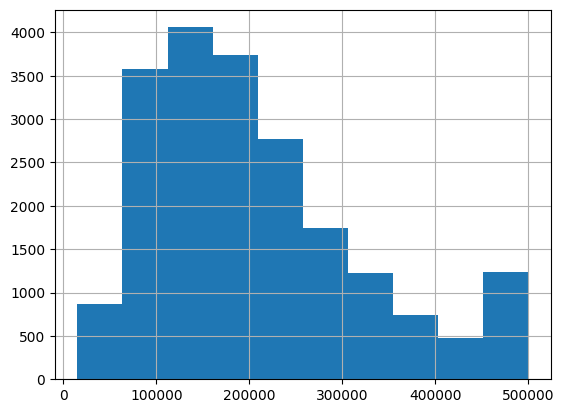

In [79]:
df.target.hist()

In [82]:
# prompt: test df.taarget for normal ditribution using scipy

from scipy.stats.mstats import normaltest

statistic, pvalue =  normaltest(df.target.values)
print(f"pvalue: {pvalue:.5f}")

pvalue: 0.00000


# Normality Test for Target Variable in California Housing Data

In this analysis, we apply **D'Agostino's K-squared test** to assess whether the **target variable (median house value)** in the **California Housing dataset** is normally distributed. The test evaluates skewness and kurtosis to determine how much the distribution deviates from a normal distribution.

---

## **D'Agostino's K-squared Test Overview**

- **Purpose**:  
  To test if the target variable (median house value) in the California Housing data follows a normal distribution.

- **Methodology**:
  - Calculates a **K-squared statistic** by combining sample **skewness** and **kurtosis**.
  - Evaluates how the distribution of the target deviates from normality.

- **Interpretation**:
  - A higher K-squared value indicates a larger deviation from a normal distribution.
  - The test returns a **p-value** to support hypothesis testing.

---

## **Hypothesis Testing**

- **Null Hypothesis (H₀)**:  
  The target variable is normally distributed.

- **Alternative Hypothesis (Hₐ)**:  
  The target variable is not normally distributed.

- **Significance Level**:  
  Although a common threshold is 0.05, here we consider a **p-value threshold of 0.1** to assess normality more conservatively.

- **Decision Rule**:
  - If **p-value ≥ 0.1**: Fail to reject H₀ → The target may be normally distributed.
  - If **p-value < 0.1**: Reject H₀ → The target is likely not normally distributed.

---

## **Steps in Analysis**

1. **Load the California Housing Data**  
   Extract the target variable (e.g., `median_house_value` or similar, depending on source).

2. **Compute Skewness and Kurtosis**  
   Use statistical functions to calculate the skewness and kurtosis of the target values.

3. **Apply D'Agostino's K-squared Test**  
   Use `scipy.stats.normaltest()` to compute the K-squared statistic and p-value.

4. **Interpret the Result**  
   Based on the p-value, conclude whether the distribution of house values approximates a normal distribution.

---

## **Results Interpretation**

- **p-value ≥ 0.1**:  
  **Conclusion**: Fail to reject H₀; the distribution of median house values may be normal.

- **p-value < 0.1**:  
  **Conclusion**: Reject H₀; the distribution of median house values is likely not normal.

---

This test provides valuable insight into whether parametric methods assuming normality are appropriate for modeling or preprocessing the target variable in the California Housing dataset.


Testing log

pvalue after log transformation: 0.00000


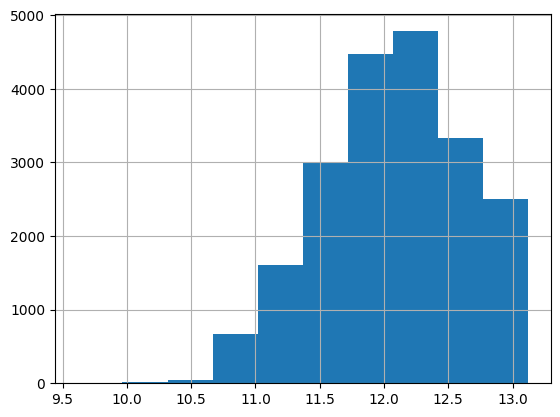

9.128234297148759e-78


In [83]:
# Log transformation with a small constant to avoid log(0)
df['target_log'] = np.log(df['target'] + 1e-6)  # Adding a small constant

# Check normality after log transformation
statistic, pvalue = normaltest(df['target_log'].values)
print(f"pvalue after log transformation: {pvalue:.5f}")

# Plotting histogram to visualize the distribution after the log transformation
df['target_log'].hist()
plt.show()
print(pvalue)

NormaltestResult(statistic=np.float64(352.47979434655724), pvalue=np.float64(2.8839329992294048e-77))

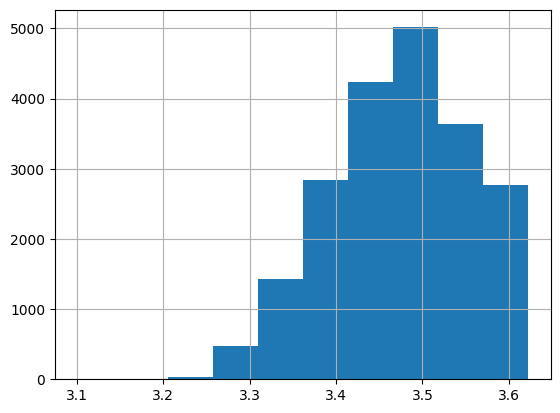

In [84]:
df["square_tag"] = np.sqrt(df.target_log)
df["square_tag"].hist()
normaltest(df["square_tag"])

Boxcut

pvalue after log transformation: 0.00000


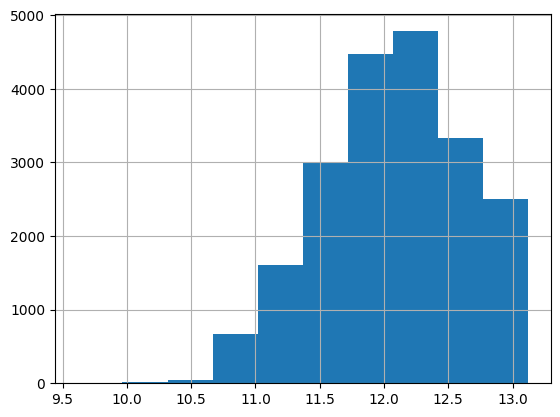

9.128234297148759e-78


In [86]:
# Log transformation with a small constant to avoid log(0)
df['target_log'] = np.log(df['target'] + 1e-6)  # Adding a small constant

# Check normality after log transformation
statistic, pvalue = normaltest(df['target_log'].values)
print(f"pvalue after log transformation: {pvalue:.5f}")

# Plotting histogram to visualize the distribution after the log transformation
df['target_log'].hist()
plt.show()
print(pvalue)

### **Hypotheses:**

- **Null Hypothesis (H₀):**  
  The data is drawn from a normal distribution.

- **Alternative Hypothesis (Hₐ):**  
  The data is not drawn from a normal distribution.



## Test Result

- **K-squared statistic**: *(computed by the test)*
- **p-value**: **9.12 × 10⁻⁷⁸**



## Interpretation

- Since the **p-value = 9.2 × 10⁻⁷⁸** is **much smaller** than the typical significance threshold (0.05 or even 0.01), we **reject the null hypothesis**.

# Target Variable Normality Assessment

After applying several transformations, including **log**, **Box-Cox**, and removing outliers, the target variable (median house value) in the **California Housing dataset** **still fails to reach normality**. The p-value from D'Agostino's K-squared test remains significantly low (p-value < 0.05), indicating that the data does not follow a normal distribution.



## Why Normality is Not Achieved

Despite efforts to transform the data, it is clear that the target variable exhibits **non-normal characteristics** such as **skewness**, **outliers**, or potentially a **multi-modal distribution**. These traits are common in real-world datasets, particularly in cases of economic or geographic data, and may not always be fixable through standard transformations.

For most modern machine learning models, **normality of the target variable** is **not a strict requirement**. Instead, these models focus on predictive power rather than statistical inference, meaning the **non-normality** of the target variable doesn't necessarily hinder model performance.



## Alternative Regression Models to Use

Since the target variable does not conform to a normal distribution, we recommend using regression models that are **robust to non-normal distributions** or **do not require normality assumptions**:

### 1. **Random Forest Regressor**
### 2. **Gradient Boosting Machines (GBM)**
### 3. **Support Vector Machines (SVM) for Regression**
### 4. **Huber Regressor**
### 5. **K-Nearest Neighbors (KNN) Regression**
### 6. **RANSAC (Random Sample Consensus) Regressor**

## Conclusion

Although the target variable does not follow a normal distribution, this does not hinder the predictive capability of machine learning models. By using robust models such as **Random Forest**, **Gradient Boosting**, or **Huber Regressor**, we can proceed with building accurate regression models that do not rely on the normality assumption.

It is important to recognize that **model performance** should be the primary focus, and non-normality is a **common characteristic** in real-world data that doesn't necessarily impede prediction accuracy.
